In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os
import csv

# Study data files
FEMA_data = "FEMA_data.csv"
US_Presidents = "USpresidents.csv"

FEMA_df = pd.read_csv(FEMA_data)
Pres_df = pd.read_csv(US_Presidents)


In [2]:
#write missing president data to president dataframe
with open(US_Presidents, "a") as myfile:
    writer=csv.writer(myfile, delimiter=",")
    myfile.write('\n')
    writer.writerow(['2014', 'Barack Obama', 'Democrat'])
    writer.writerow(['2015', 'Barack Obama', 'Democrat'])
    writer.writerow(['2016', 'Barack Obama', 'Democrat'])
    writer.writerow(['2017', 'Donald Trump', 'Republican'])

In [3]:
# Pull out year in Start Date in FEMA data 
FEMA_df_start_date = pd.to_datetime(FEMA_df['Start Date'])
FEMA_df_end_date = pd.to_datetime(FEMA_df['End Date'])

disaster_length = FEMA_df_end_date - FEMA_df_start_date

In [4]:
disaster_length

0       0 days
1       0 days
2       0 days
3       0 days
4       0 days
         ...  
46180   9 days
46181   9 days
46182   9 days
46183   9 days
46184   9 days
Length: 46185, dtype: timedelta64[ns]

In [5]:
FEMA_df['Year'] = pd.DatetimeIndex(FEMA_df['Start Date']).year
FEMA_df['End Year'] = pd.DatetimeIndex(FEMA_df['End Date']).year
Pres_df = Pres_df.rename(columns={"Years (after inauguration)":"Year"})

In [6]:
Pres_df

,Year,President,Party
0,1789,George Washington,None
1,1790,George Washington,None
2,1791,George Washington,None
3,1792,George Washington,None
4,1793,George Washington,None
...,...,...,...
234,2017,Donald Trump,Republican
235,2014,Barack Obama,Democrat
236,2015,Barack Obama,Democrat
237,2016,Barack Obama,Democrat


In [7]:
merged_df = pd.merge(FEMA_df, Pres_df, on="Year", how="left")

In [8]:
merged_df

,Declaration Number,Declaration Type,Declaration Date,State,County,Disaster Type,Disaster Title,Start Date,End Date,Close Date,Individual Assistance Program,Individuals & Households Program,Public Assistance Program,Hazard Mitigation Program,Year,End Year,President,Party
0,DR-1,Disaster,05/02/1953,GA,NaN,Tornado,Tornado,05/02/1953,05/02/1953,06/01/1954,Yes,No,Yes,Yes,1953,1953.0,Dwight D. Eisenhower,Republican
1,DR-2,Disaster,05/15/1953,TX,NaN,Tornado,Tornado and Heavy Rainfall,05/15/1953,05/15/1953,01/01/1958,Yes,No,Yes,Yes,1953,1953.0,Dwight D. Eisenhower,Republican
2,DR-3,Disaster,05/29/1953,LA,NaN,Flood,Flood,05/29/1953,05/29/1953,02/01/1960,Yes,No,Yes,Yes,1953,1953.0,Dwight D. Eisenhower,Republican
3,DR-4,Disaster,06/02/1953,MI,NaN,Tornado,Tornado,06/02/1953,06/02/1953,02/01/1956,Yes,No,Yes,Yes,1953,1953.0,Dwight D. Eisenhower,Republican
4,DR-5,Disaster,06/06/1953,MT,NaN,Flood,Floods,06/06/1953,06/06/1953,12/01/1955,Yes,No,Yes,Yes,1953,1953.0,Dwight D. Eisenhower,Republican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51744,DR-4301,Disaster,02/14/2017,CA,Yolo County,Storm,"Severe Winter Storms, Flooding, and Mudslides",01/03/2017,01/12/2017,NaN,No,No,Yes,Yes,2017,2017.0,Donald Trump,Republican
51745,DR-4301,Disaster,02/14/2017,CA,Yolo County,Storm,"Severe Winter Storms, Flooding, and Mudslides",01/03/2017,01/12/2017,NaN,No,No,Yes,Yes,2017,2017.0,Donald Trump,Republican
51746,DR-4301,Disaster,02/14/2017,CA,Yuba County,Storm,"Severe Winter Storms, Flooding, and Mudslides",01/03/2017,01/12/2017,NaN,No,No,Yes,Yes,2017,2017.0,Donald Trump,Republican
51747,DR-4301,Disaster,02/14/2017,CA,Yuba County,Storm,"Severe Winter Storms, Flooding, and Mudslides",01/03/2017,01/12/2017,NaN,No,No,Yes,Yes,2017,2017.0,Donald Trump,Republican


In [9]:
#Finding number of disaster declarations by president
president_group = merged_df.groupby(["President"])["Declaration Number"].nunique()
president_group

President
Barack Obama             763
Bill Clinton             554
Donald Trump               8
Dwight D. Eisenhower     106
George Bush              159
George W. Bush          1033
Gerald Ford              133
Jimmy Carter             176
John F. Kennedy           34
Lyndon B. Johnson        111
Richard M. Nixon         157
Ronald Reagan            193
Name: Declaration Number, dtype: int64

In [10]:
#Finding number of years each president served 
president_term = merged_df.groupby(["President"])["Year"].nunique()
president_term

President
Barack Obama            8
Bill Clinton            8
Donald Trump            1
Dwight D. Eisenhower    8
George Bush             4
George W. Bush          8
Gerald Ford             3
Jimmy Carter            4
John F. Kennedy         2
Lyndon B. Johnson       6
Richard M. Nixon        5
Ronald Reagan           8
Name: Year, dtype: int64

In [11]:
#cleaning out unnecesssary columns 
cleaned_df = merged_df[["Year", "President", "Party", "Declaration Number","Declaration Type", "Disaster Type", "State", "Start Date", "End Date"]]

In [12]:
cleaned_df

,Year,President,Party,Declaration Number,Declaration Type,Disaster Type,State,Start Date,End Date
0,1953,Dwight D. Eisenhower,Republican,DR-1,Disaster,Tornado,GA,05/02/1953,05/02/1953
1,1953,Dwight D. Eisenhower,Republican,DR-2,Disaster,Tornado,TX,05/15/1953,05/15/1953
2,1953,Dwight D. Eisenhower,Republican,DR-3,Disaster,Flood,LA,05/29/1953,05/29/1953
3,1953,Dwight D. Eisenhower,Republican,DR-4,Disaster,Tornado,MI,06/02/1953,06/02/1953
4,1953,Dwight D. Eisenhower,Republican,DR-5,Disaster,Flood,MT,06/06/1953,06/06/1953
...,...,...,...,...,...,...,...,...,...
51744,2017,Donald Trump,Republican,DR-4301,Disaster,Storm,CA,01/03/2017,01/12/2017
51745,2017,Donald Trump,Republican,DR-4301,Disaster,Storm,CA,01/03/2017,01/12/2017
51746,2017,Donald Trump,Republican,DR-4301,Disaster,Storm,CA,01/03/2017,01/12/2017
51747,2017,Donald Trump,Republican,DR-4301,Disaster,Storm,CA,01/03/2017,01/12/2017


In [13]:
cleaned_df = cleaned_df.drop_duplicates(subset = ["Declaration Number"], keep="first")

In [14]:
cleaned_df

,Year,President,Party,Declaration Number,Declaration Type,Disaster Type,State,Start Date,End Date
0,1953,Dwight D. Eisenhower,Republican,DR-1,Disaster,Tornado,GA,05/02/1953,05/02/1953
1,1953,Dwight D. Eisenhower,Republican,DR-2,Disaster,Tornado,TX,05/15/1953,05/15/1953
2,1953,Dwight D. Eisenhower,Republican,DR-3,Disaster,Flood,LA,05/29/1953,05/29/1953
3,1953,Dwight D. Eisenhower,Republican,DR-4,Disaster,Tornado,MI,06/02/1953,06/02/1953
4,1953,Dwight D. Eisenhower,Republican,DR-5,Disaster,Flood,MT,06/06/1953,06/06/1953
...,...,...,...,...,...,...,...,...,...
51599,2017,Donald Trump,Republican,DR-4299,Disaster,Storm,OK,01/13/2017,01/16/2017
51629,2017,Donald Trump,Republican,DR-4300,Disaster,Tornado,LA,02/07/2017,02/07/2017
51635,2017,Donald Trump,Republican,DR-4302,Disaster,Storm,CA,01/03/2017,01/05/2017
51638,2017,Donald Trump,Republican,EM-3381,Emergency,Dam/Levee Break,CA,02/07/2017,NaN


In [15]:
president_disaster_count = pd.DataFrame(data=
        {"President Term":president_term, 
        "Disaster Count":president_group})

In [16]:
president_disaster_count

,President Term,Disaster Count
President,,
Barack Obama,8,763
Bill Clinton,8,554
Donald Trump,1,8
Dwight D. Eisenhower,8,106
George Bush,4,159
George W. Bush,8,1033
Gerald Ford,3,133
Jimmy Carter,4,176
John F. Kennedy,2,34


In [17]:
pres_party = pd.merge(president_disaster_count, cleaned_df[["Party", "President"]], on="President", how="left")
pres_party = pres_party.drop_duplicates(keep="first").reset_index()
pres_party

,index,President,President Term,Disaster Count,Party
0,0,Barack Obama,8,763,Democrat
1,763,Bill Clinton,8,554,Democrat
2,1317,Donald Trump,1,8,Republican
3,1325,Dwight D. Eisenhower,8,106,Republican
4,1431,George Bush,4,159,Republican
5,1590,George W. Bush,8,1033,Republican
6,2623,Gerald Ford,3,133,Republican
7,2756,Jimmy Carter,4,176,Democrat
8,2932,John F. Kennedy,2,34,Democrat
9,2966,Lyndon B. Johnson,6,111,Democrat


In [18]:
pres_party = pres_party.drop(columns="index")

In [19]:
#pres_party = pd.DataFrame(index_col = "President")

In [20]:
pres_party

,President,President Term,Disaster Count,Party
0,Barack Obama,8,763,Democrat
1,Bill Clinton,8,554,Democrat
2,Donald Trump,1,8,Republican
3,Dwight D. Eisenhower,8,106,Republican
4,George Bush,4,159,Republican
5,George W. Bush,8,1033,Republican
6,Gerald Ford,3,133,Republican
7,Jimmy Carter,4,176,Democrat
8,John F. Kennedy,2,34,Democrat
9,Lyndon B. Johnson,6,111,Democrat


In [21]:
pres_party["Avg Declarations per Year"] = pres_party["Disaster Count"] / pres_party["President Term"]

In [22]:
pres_party

,President,President Term,Disaster Count,Party,Avg Declarations per Year
0,Barack Obama,8,763,Democrat,95.375000
1,Bill Clinton,8,554,Democrat,69.250000
2,Donald Trump,1,8,Republican,8.000000
3,Dwight D. Eisenhower,8,106,Republican,13.250000
4,George Bush,4,159,Republican,39.750000
5,George W. Bush,8,1033,Republican,129.125000
6,Gerald Ford,3,133,Republican,44.333333
7,Jimmy Carter,4,176,Democrat,44.000000
8,John F. Kennedy,2,34,Democrat,17.000000
9,Lyndon B. Johnson,6,111,Democrat,18.500000


In [23]:
#dfObj[ dfObj['Age'] == 30 ].index
drop_year = cleaned_df[cleaned_df["Year"]==2017].index

In [24]:
#dfObj.drop( dfObj[ dfObj['Age'] == 30 ].index , inplace=True)
cleaned_df.drop(drop_year, inplace = True)

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
cleaned_df

,Year,President,Party,Declaration Number,Declaration Type,Disaster Type,State,Start Date,End Date
0,1953,Dwight D. Eisenhower,Republican,DR-1,Disaster,Tornado,GA,05/02/1953,05/02/1953
1,1953,Dwight D. Eisenhower,Republican,DR-2,Disaster,Tornado,TX,05/15/1953,05/15/1953
2,1953,Dwight D. Eisenhower,Republican,DR-3,Disaster,Flood,LA,05/29/1953,05/29/1953
3,1953,Dwight D. Eisenhower,Republican,DR-4,Disaster,Tornado,MI,06/02/1953,06/02/1953
4,1953,Dwight D. Eisenhower,Republican,DR-5,Disaster,Flood,MT,06/06/1953,06/06/1953
...,...,...,...,...,...,...,...,...,...
51374,2016,Barack Obama,Democrat,DR-4290,Disaster,Flood,MN,09/21/2016,09/24/2016
51404,2016,Barack Obama,Democrat,DR-4292,Disaster,Flood,PA,10/20/2016,10/21/2016
51416,2016,Barack Obama,Democrat,DR-4293,Disaster,Fire,TN,11/28/2016,12/09/2016
51452,2016,Barack Obama,Democrat,DR-4296,Disaster,Storm,OR,12/14/2016,12/17/2016


In [28]:
cleaned_df["Disaster Length"] = pd.to_datetime(cleaned_df["End Date"]) - pd.to_datetime(cleaned_df["Start Date"])

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
cleaned_df

,Year,President,Party,Declaration Number,Declaration Type,Disaster Type,State,Start Date,End Date,Disaster Length
0,1953,Dwight D. Eisenhower,Republican,DR-1,Disaster,Tornado,GA,05/02/1953,05/02/1953,0 days
1,1953,Dwight D. Eisenhower,Republican,DR-2,Disaster,Tornado,TX,05/15/1953,05/15/1953,0 days
2,1953,Dwight D. Eisenhower,Republican,DR-3,Disaster,Flood,LA,05/29/1953,05/29/1953,0 days
3,1953,Dwight D. Eisenhower,Republican,DR-4,Disaster,Tornado,MI,06/02/1953,06/02/1953,0 days
4,1953,Dwight D. Eisenhower,Republican,DR-5,Disaster,Flood,MT,06/06/1953,06/06/1953,0 days
...,...,...,...,...,...,...,...,...,...,...
51374,2016,Barack Obama,Democrat,DR-4290,Disaster,Flood,MN,09/21/2016,09/24/2016,3 days
51404,2016,Barack Obama,Democrat,DR-4292,Disaster,Flood,PA,10/20/2016,10/21/2016,1 days
51416,2016,Barack Obama,Democrat,DR-4293,Disaster,Fire,TN,11/28/2016,12/09/2016,11 days
51452,2016,Barack Obama,Democrat,DR-4296,Disaster,Storm,OR,12/14/2016,12/17/2016,3 days


In [30]:
pres_party

,President,President Term,Disaster Count,Party,Avg Declarations per Year
0,Barack Obama,8,763,Democrat,95.375000
1,Bill Clinton,8,554,Democrat,69.250000
2,Donald Trump,1,8,Republican,8.000000
3,Dwight D. Eisenhower,8,106,Republican,13.250000
4,George Bush,4,159,Republican,39.750000
5,George W. Bush,8,1033,Republican,129.125000
6,Gerald Ford,3,133,Republican,44.333333
7,Jimmy Carter,4,176,Democrat,44.000000
8,John F. Kennedy,2,34,Democrat,17.000000
9,Lyndon B. Johnson,6,111,Democrat,18.500000


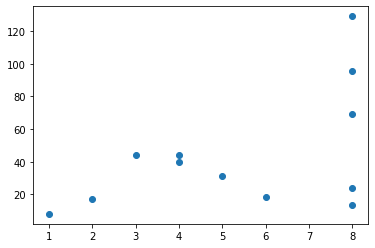

In [32]:
plt.scatter(x=pres_party['President Term'], y=pres_party["Avg Declarations per Year"])

ValueError: x and y must be the same size

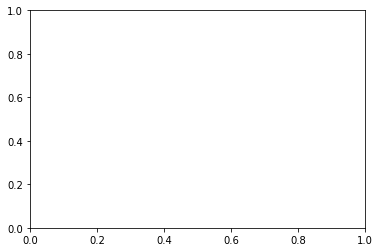

In [35]:
pres_term_df = pd.DataFrame(data=
        {"President Term":president_term}) 

In [36]:
pres_term_df

,President Term
President,
Barack Obama,8
Bill Clinton,8
Donald Trump,1
Dwight D. Eisenhower,8
George Bush,4
George W. Bush,8
Gerald Ford,3
Jimmy Carter,4
John F. Kennedy,2


In [37]:
new_cleaned_df = pd.merge(cleaned_df, pres_term_df, on="President", how="left")

In [38]:
new_cleaned_df

,Year,President,Party,Declaration Number,Declaration Type,Disaster Type,State,Start Date,End Date,Disaster Length,President Term
0,1953,Dwight D. Eisenhower,Republican,DR-1,Disaster,Tornado,GA,05/02/1953,05/02/1953,0 days,8
1,1953,Dwight D. Eisenhower,Republican,DR-2,Disaster,Tornado,TX,05/15/1953,05/15/1953,0 days,8
2,1953,Dwight D. Eisenhower,Republican,DR-3,Disaster,Flood,LA,05/29/1953,05/29/1953,0 days,8
3,1953,Dwight D. Eisenhower,Republican,DR-4,Disaster,Tornado,MI,06/02/1953,06/02/1953,0 days,8
4,1953,Dwight D. Eisenhower,Republican,DR-5,Disaster,Flood,MT,06/06/1953,06/06/1953,0 days,8
...,...,...,...,...,...,...,...,...,...,...,...
3414,2016,Barack Obama,Democrat,DR-4290,Disaster,Flood,MN,09/21/2016,09/24/2016,3 days,8
3415,2016,Barack Obama,Democrat,DR-4292,Disaster,Flood,PA,10/20/2016,10/21/2016,1 days,8
3416,2016,Barack Obama,Democrat,DR-4293,Disaster,Fire,TN,11/28/2016,12/09/2016,11 days,8
3417,2016,Barack Obama,Democrat,DR-4296,Disaster,Storm,OR,12/14/2016,12/17/2016,3 days,8


TypeError: Cannot cast scalar from dtype('<m8[ns]') to dtype('<m8') according to the rule 'same_kind'

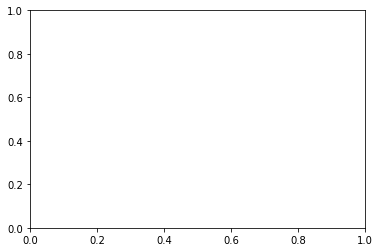

In [47]:
plt.scatter(x=new_cleaned_df['President Term'], y=(new_cleaned_df["Disaster Length"]))